In [208]:
import pandas as pd
import numpy as np
from scipy import stats

# visualization:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# interaction:
from ipywidgets import interact


# modeling:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier #Knn
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.tree import DecisionTreeClassifier #Decision Tree 
from sklearn.ensemble import RandomForestClassifier #Random Forest 

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Functions:

In [139]:
def match_time(match):
    
    subset = data.loc[data['match_id'] == data.match_id.unique()[match]]
    time = 3*subset.shape[0]-3
    
    if time <= 60:
        print('Match {} is {} seconds long.'.format(match,time))
    else:
        time = time/60
        print('Match {} is {} minutes long.'.format(match,time))

In [203]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [204]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [ ]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

In [197]:
## to finish
def highlight_max_corr(s):
    '''
    Highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [198]:
## to finish
def highlight_min_corr(s):
    '''
    Highlight the minimum in a Series green.
    '''
    is_max = s == s.min()
    return ['background-color: green' if v else '' for v in is_max]

In [223]:
def plot_feature_importances(model, df):
    """
    The function takes the model and the dataframe and returns graph showing the importance of
    the features.
    """
    names = df.columns[model.feature_importances_.argsort()]
    model.feature_importances_.sort()
    plt.figure(figsize=(15,15))
    n_features = len(names)
    plt.barh(range(n_features), np.sort(model.feature_importances_), align='center')
    plt.yticks(np.arange(n_features), names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

# Gathering Data:

In [140]:
original_data = pd.read_csv('aoe_data.csv')

In [141]:
data = original_data.copy()

# Exploratory Data Analysis:

In [142]:
data.shape

(1808535, 67)

In [143]:
pd.set_option('display.max_columns', None)
data.head(10)

,match_id,current_time,diff_units_infantry,diff_units_ranged,diff_units_siege,diff_units_war_ships,diff_units_cavalry_archers,diff_units_cavalry,diff_units_monks,diff_units_idle_fishing_ships,diff_units_stone_miners,diff_units_gold_miners,diff_units_lumberjacks,diff_units_hunters,diff_units_foragers,diff_units_farmers,diff_units_idle_villagers,diff_units_fishermen,diff_units_sheperds,diff_units_trade,diff_units_fishing_ships,diff_units_repairer,diff_units_builder,diff_current_resources_food,diff_current_resources_wood,diff_current_resources_stone,diff_current_resources_gold,diff_total_resources_food,diff_total_resources_wood,diff_total_resources_stone,diff_total_resources_gold,diff_total_resources_relic_gold,diff_total_resources_trade_cart_gold,diff_population_total,diff_population_headroom,diff_population_civilian,diff_population_military,diff_counters_stone_miners,diff_counters_gold_miners,diff_counters_lumberjacks,diff_counters_hunters,diff_counters_foragers,diff_counters_farmers,diff_counters_idle_villagers,diff_counters_fishermen,diff_counters_sheperds,diff_counters_fishing_ships,diff_counters_idle_fishing_ships,diff_counters_trade,diff_percent_explored,diff_relics,diff_losses,diff_units_queued,diff_units_training,diff_castles,diff_worth_spent,diff_worth_destroyed,diff_worth_lost,diff_score_military,diff_score_economy,diff_score_technology,diff_score_society,diff_score_total,diff_kills,diff_razes,player_1_wins,diff_rating
0,16720609,300,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,2,0,0,2,0,0,0,43
1,16720609,3394,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,2,0,0,2,0,0,0,43
2,16720609,6499,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4,-1,0,10,0,0,0,22,0,0,22,0,0,0,43
3,16720609,9604,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,200,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4,-1,0,10,0,0,0,25,0,0,25,0,0,0,43
4,16720609,12709,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-3,200,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,-4,-1,0,10,0,0,0,28,0,0,28,0,0,0,43
5,16720609,15814,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-3,200,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,-4,-1,0,10,0,0,0,28,0,0,28,0,0,0,43
6,16720609,18919,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-3,200,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,-4,-1,0,10,0,0,0,28,0,0,28,0,0,0,43
7,16720609,22024,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3,200,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4,-1,0,10,0,0,0,28,0,0,28,0,0,0,43
8,16720609,25129,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,200,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4,-1,0,10,0,0,0,25,0,0,25,0,0,0,43
9,16720609,28141,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,-2,0,0,0,0,0,0,200,30,0,-50,0,0,0,0,0,0,0,-5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4,-1,0,-20,0,0,0,14,0,0,14,0,0,0,43


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808535 entries, 0 to 1808534
Data columns (total 67 columns):
match_id                                int64
current_time                            int64
diff_units_infantry                     int64
diff_units_ranged                       int64
diff_units_siege                        int64
diff_units_war_ships                    int64
diff_units_cavalry_archers              int64
diff_units_cavalry                      int64
diff_units_monks                        int64
diff_units_idle_fishing_ships           int64
diff_units_stone_miners                 int64
diff_units_gold_miners                  int64
diff_units_lumberjacks                  int64
diff_units_hunters                      int64
diff_units_foragers                     int64
diff_units_farmers                      int64
diff_units_idle_villagers               int64
diff_units_fishermen                    int64
diff_units_sheperds                     int64
diff_units_tr

## Matches information:

In [145]:
data.match_id.unique()

array([16720609, 16720610, 16720612, ..., 17596486, 17596627, 17596824])

In [146]:
print('This dataset contains information about {} matches.'.format(len(data.match_id.unique())))

This dataset contains information about 2234 matches.


In [147]:
# Sort by match_id (ascending):
data = data.sort_values(by='match_id', ascending=True)

In [148]:
shape1 = data.loc[data['match_id'] == data.match_id.unique()[0]].shape
shape2 = data.loc[data['match_id'] == data.match_id.unique()[1]].shape

print('First match shape: {} \nSecond match shape: {}'.format(shape1, shape2))

First match shape: (9, 67) 
Second match shape: (1434, 67)


In [149]:
match_time(0)
match_time(1)

Match 0 is 24 seconds long.
Match 1 is 71.65 minutes long.


In [150]:
snapshots = pd.DataFrame(data.groupby(['match_id']).size())
snapshots.columns = ['rows']
snapshots.head()

,rows
match_id,
16537101,9
16720609,1434
16720610,65
16720612,104
16720613,1104


In [151]:
print('Rows per Match Histogram:')
px.histogram(snapshots, x='rows')

Rows per Match Histogram:


In [152]:
len(data.match_id.unique())-75-32-10

2117

In [153]:
99*3/60

4.95

In [154]:
2450*3/60/60

2.0416666666666665

In [155]:

data1 = data[data.groupby("match_id")['match_id'].transform('size') > 99]
data1 = data1[data.groupby("match_id")['match_id'].transform('size') < 2450]

/Users/plopezbar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [156]:
len(data1.match_id.unique())

2117

In [157]:
snapshots1 = pd.DataFrame(data1.groupby(['match_id']).size())
snapshots1.columns = ['rows']
snapshots1.head()

,rows
match_id,
16720609,1434
16720612,104
16720613,1104
16720615,535
16720616,1013


In [158]:
print('Rows per Match Histogram:')
px.histogram(snapshots1, x='rows')

Rows per Match Histogram:


In [159]:
data1 = data1.sort_values(by='match_id', ascending=True).reset_index()
del data1['index']
data1

,match_id,current_time,diff_units_infantry,diff_units_ranged,diff_units_siege,diff_units_war_ships,diff_units_cavalry_archers,diff_units_cavalry,diff_units_monks,diff_units_idle_fishing_ships,diff_units_stone_miners,diff_units_gold_miners,diff_units_lumberjacks,diff_units_hunters,diff_units_foragers,diff_units_farmers,diff_units_idle_villagers,diff_units_fishermen,diff_units_sheperds,diff_units_trade,diff_units_fishing_ships,diff_units_repairer,diff_units_builder,diff_current_resources_food,diff_current_resources_wood,diff_current_resources_stone,diff_current_resources_gold,diff_total_resources_food,diff_total_resources_wood,diff_total_resources_stone,diff_total_resources_gold,diff_total_resources_relic_gold,diff_total_resources_trade_cart_gold,diff_population_total,diff_population_headroom,diff_population_civilian,diff_population_military,diff_counters_stone_miners,diff_counters_gold_miners,diff_counters_lumberjacks,diff_counters_hunters,diff_counters_foragers,diff_counters_farmers,diff_counters_idle_villagers,diff_counters_fishermen,diff_counters_sheperds,diff_counters_fishing_ships,diff_counters_idle_fishing_ships,diff_counters_trade,diff_percent_explored,diff_relics,diff_losses,diff_units_queued,diff_units_training,diff_castles,diff_worth_spent,diff_worth_destroyed,diff_worth_lost,diff_score_military,diff_score_economy,diff_score_technology,diff_score_society,diff_score_total,diff_kills,diff_razes,player_1_wins,diff_rating
0,16720609,2899231,15,8,2,0,0,5,-4,0,4,-2,-14,0,0,7,9,0,0,0,0,0,-5,-56,-978,759,-44,-516,-6074,803,-2037,-1289,0,25,15,-1,26,12,-6,-43,0,0,24,27,0,0,0,0,0,0,-1,-4,11,2,0,-4891,990,-1290,198,534,-1544,0,-812,4,1,0,43
1,16720609,124621,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-3,0,0,0,0,-64,30,0,-50,-64,0,0,0,0,0,-2,-3,-2,0,0,0,0,0,0,0,0,0,-9,0,0,0,0,0,0,2,1,0,-70,0,0,0,-32,10,0,-22,0,0,0,43
2,16720609,67336,-1,0,0,0,0,1,0,0,0,0,-1,0,0,0,-1,0,-2,0,0,0,0,0,30,0,-50,0,0,0,0,0,0,-2,-3,-2,0,0,0,-3,0,0,0,-3,0,-6,0,0,0,0,0,0,2,0,0,-70,0,0,0,-26,10,0,-16,0,0,0,43
3,16720609,64321,-1,0,0,0,0,1,0,0,0,0,-1,0,0,0,-1,0,-2,0,0,0,0,0,30,0,-50,0,0,0,0,0,0,-2,-3,-2,0,0,0,-3,0,0,0,-3,0,-6,0,0,0,0,0,0,2,0,0,-70,0,0,0,-26,10,0,-16,0,0,0,43
4,16720609,61306,-1,0,0,0,0,1,0,0,0,0,-1,0,0,0,-1,0,-2,0,0,0,0,0,30,0,-50,0,0,0,0,0,0,-2,-3,-2,0,0,0,-2,0,0,0,-2,0,-4,0,0,0,0,0,0,2,0,0,-70,0,0,0,-26,10,0,-16,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771711,17596824,3390096,14,0,-2,5,0,0,0,0,-7,0,7,0,0,-9,-16,-3,0,0,0,0,-17,748,270,-20,-160,-6362,2080,310,-1532,-1179,0,-28,23,-45,17,-14,0,14,0,0,-18,-32,-6,0,0,0,0,13,-2,-4,-4,-3,-1,-3242,2289,-774,458,-509,156,0,105,2,8,0,11
1771712,17596824,3387096,14,0,-2,4,0,0,0,0,-7,0,7,0,0,-9,-16,-3,0,0,0,0,-17,-269,250,-20,13,-6379,2060,310,-1359,-1177,0,-29,24,-45,16,-21,0,22,0,0,-26,-49,-9,0,0,0,0,13,-2,-4,-3,-2,-1,-3494,2139,-474,428,-645,156,0,-61,2,7,0,11
1771713,17596824,3384096,14,0,-2,4,0,0,0,0,-7,0,8,0,0,-8,-17,-3,0,0,0,0,-18,-369,184,-20,16,-6479,1994,310,-1356,-1173,0,-29,24,-45,16,-21,0,24,0,0,-23,-49,-9,0,0,0,0,13,-2,-4,-3,-2,-1,-3434,2139,-474,428,-649,156,0,-65,2,7,0,11
1771714,17596824,3402096,13,0,-2,2,0,0,0,0,-7,0,8,0,0,-9,-15,-3,0,0,0,0,-19,608,431,-40,-82,-6187,2196,290,-1544,-1191,0,-32,27,-45,13,-21,0,24,0,0,-29,-49,-9,0,0,0,0,13,-2,-3,6,1,-1,-3662,2379,-1014,476,-585,156,0,47,1,9,0,11


In [164]:
# sort by match_id and current time:

data1 = data1.sort_values(by=['match_id', 'current_time'])
data1

,match_id,current_time,diff_units_infantry,diff_units_ranged,diff_units_siege,diff_units_war_ships,diff_units_cavalry_archers,diff_units_cavalry,diff_units_monks,diff_units_idle_fishing_ships,diff_units_stone_miners,diff_units_gold_miners,diff_units_lumberjacks,diff_units_hunters,diff_units_foragers,diff_units_farmers,diff_units_idle_villagers,diff_units_fishermen,diff_units_sheperds,diff_units_trade,diff_units_fishing_ships,diff_units_repairer,diff_units_builder,diff_current_resources_food,diff_current_resources_wood,diff_current_resources_stone,diff_current_resources_gold,diff_total_resources_food,diff_total_resources_wood,diff_total_resources_stone,diff_total_resources_gold,diff_total_resources_relic_gold,diff_total_resources_trade_cart_gold,diff_population_total,diff_population_headroom,diff_population_civilian,diff_population_military,diff_counters_stone_miners,diff_counters_gold_miners,diff_counters_lumberjacks,diff_counters_hunters,diff_counters_foragers,diff_counters_farmers,diff_counters_idle_villagers,diff_counters_fishermen,diff_counters_sheperds,diff_counters_fishing_ships,diff_counters_idle_fishing_ships,diff_counters_trade,diff_percent_explored,diff_relics,diff_losses,diff_units_queued,diff_units_training,diff_castles,diff_worth_spent,diff_worth_destroyed,diff_worth_lost,diff_score_military,diff_score_economy,diff_score_technology,diff_score_society,diff_score_total,diff_kills,diff_razes,player_1_wins,diff_rating
957,16720609,300,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,2,0,0,2,0,0,0,43
364,16720609,3394,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,2,0,0,2,0,0,0,43
5,16720609,6499,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4,-1,0,10,0,0,0,22,0,0,22,0,0,0,43
13,16720609,9604,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,200,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4,-1,0,10,0,0,0,25,0,0,25,0,0,0,43
12,16720609,12709,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-3,200,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,-4,-1,0,10,0,0,0,28,0,0,28,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771681,17596824,3426096,15,0,-2,2,0,0,0,0,-5,0,8,0,0,-11,-32,-3,0,0,0,0,-2,284,1252,-80,44,-6511,2347,250,-1568,-1215,0,-30,25,-45,15,-15,0,24,0,0,-33,-96,-9,0,0,0,0,13,-2,-1,-3,-1,-1,-3792,2259,-894,452,-553,156,0,55,-1,9,0,11
1770621,17596824,3428886,15,0,-2,0,0,0,0,0,-5,0,8,0,0,-11,-32,-3,0,0,0,0,-2,219,1712,-80,-43,-6576,2307,250,-1655,-1217,0,-32,27,-45,13,-15,0,24,0,0,-33,-96,-9,0,0,0,0,13,-2,-1,-1,-1,-1,-4092,2259,-894,452,-582,156,0,26,-1,9,0,11
1769486,17596824,3429096,15,0,-2,0,0,0,0,0,-5,0,8,0,0,-11,-32,-3,0,0,0,0,-2,198,1752,-80,-44,-6597,2347,250,-1656,-1219,0,-32,27,-45,13,-15,0,24,0,0,-33,-96,-9,0,0,0,0,13,-2,-1,-1,-1,-1,-4092,2259,-894,452,-580,156,0,28,-1,9,0,11
1770627,17596824,3431886,15,0,-2,0,0,0,0,0,-5,0,8,0,0,-12,-32,-3,0,0,0,0,-1,955,1862,-80,-152,-6640,2367,250,-1794,-1221,0,-32,27,-45,13,-15,0,24,0,0,-34,-96,-9,0,0,0,0,13,-2,-1,-2,-2,-1,-4152,2259,-894,452,-515,156,0,93,-1,9,0,11


In [168]:
m_16720609 = data1.loc[data1['match_id'] == 16720609]
m_16720609

,match_id,current_time,diff_units_infantry,diff_units_ranged,diff_units_siege,diff_units_war_ships,diff_units_cavalry_archers,diff_units_cavalry,diff_units_monks,diff_units_idle_fishing_ships,diff_units_stone_miners,diff_units_gold_miners,diff_units_lumberjacks,diff_units_hunters,diff_units_foragers,diff_units_farmers,diff_units_idle_villagers,diff_units_fishermen,diff_units_sheperds,diff_units_trade,diff_units_fishing_ships,diff_units_repairer,diff_units_builder,diff_current_resources_food,diff_current_resources_wood,diff_current_resources_stone,diff_current_resources_gold,diff_total_resources_food,diff_total_resources_wood,diff_total_resources_stone,diff_total_resources_gold,diff_total_resources_relic_gold,diff_total_resources_trade_cart_gold,diff_population_total,diff_population_headroom,diff_population_civilian,diff_population_military,diff_counters_stone_miners,diff_counters_gold_miners,diff_counters_lumberjacks,diff_counters_hunters,diff_counters_foragers,diff_counters_farmers,diff_counters_idle_villagers,diff_counters_fishermen,diff_counters_sheperds,diff_counters_fishing_ships,diff_counters_idle_fishing_ships,diff_counters_trade,diff_percent_explored,diff_relics,diff_losses,diff_units_queued,diff_units_training,diff_castles,diff_worth_spent,diff_worth_destroyed,diff_worth_lost,diff_score_military,diff_score_economy,diff_score_technology,diff_score_society,diff_score_total,diff_kills,diff_razes,player_1_wins,diff_rating
957,16720609,300,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,2,0,0,2,0,0,0,43
364,16720609,3394,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,2,0,0,2,0,0,0,43
5,16720609,6499,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4,-1,0,10,0,0,0,22,0,0,22,0,0,0,43
13,16720609,9604,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,200,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4,-1,0,10,0,0,0,25,0,0,25,0,0,0,43
12,16720609,12709,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-3,200,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,-4,-1,0,10,0,0,0,28,0,0,28,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,16720609,4321531,-44,8,-4,0,0,0,-1,0,0,0,-38,0,0,-34,16,0,0,0,0,0,1,-4301,-14775,-358,448,-6697,-15320,0,-2881,-1873,0,-96,6,-55,-41,0,0,-114,0,0,-102,50,0,0,0,0,0,0,0,50,-25,1,-2,-14018,-9605,16740,-1921,-3502,-942,0,-6365,-48,1,0,43
1414,16720609,4324546,-45,9,-4,0,0,0,-1,0,0,0,-34,0,0,-27,3,0,0,0,0,0,1,-4331,-14735,-358,447,-6727,-15280,0,-2882,-1874,0,-97,7,-55,-41,0,0,-106,0,0,-87,21,0,0,0,0,0,0,0,51,-25,0,-2,-14068,-9655,16790,-1931,-3511,-942,0,-6384,-49,1,0,43
1416,16720609,4327561,-46,9,-4,0,0,0,-1,0,0,0,-34,0,0,-27,2,0,0,0,0,0,1,-4391,-14844,-358,446,-6786,-15389,0,-2883,-1875,0,-99,9,-56,-42,0,0,-68,0,0,-54,8,0,0,0,0,0,0,0,52,-24,0,-2,-14178,-9705,16840,-1941,-3551,-942,0,-6434,-50,1,0,43
1412,16720609,4330576,-48,9,-4,0,0,0,-1,0,0,0,-35,0,0,-30,5,0,0,0,0,0,1,-4391,-14944,-358,445,-6786,-15489,0,-2884,-1876,0,-103,13,-57,-44,0,0,-103,0,0,-84,6,0,0,0,0,0,0,0,55,-23,-1,-2,-14398,-9865,17000,-1973,-3604,-942,0,-6519,-53,1,0,43


## NA Details:

In [160]:
data.isna().sum().sum()

0

In [161]:
# Exhaustive -> pd.set_option('display.max_rows', aoe.shape[0])
data.isna().sum()

match_id               0
current_time           0
diff_units_infantry    0
diff_units_ranged      0
diff_units_siege       0
                      ..
diff_score_total       0
diff_kills             0
diff_razes             0
player_1_wins          0
diff_rating            0
Length: 67, dtype: int64

## Target Column:

In [19]:
data.player_1_wins.value_counts()

0    909580
1    898955
Name: player_1_wins, dtype: int64

Target Column Count:


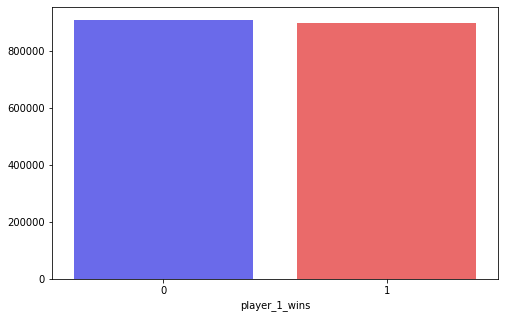

In [20]:
print('Target Column Count:')
plt.figure(figsize=(8,5))
sns.countplot(data.player_1_wins, palette='seismic')
plt.ylabel('')
plt.savefig('images/player_1_wins_Count')
plt.show()

In [21]:
#fig, axes = plt.subplots(nrows=67, ncols=1, figsize=(20,153))
#fig.subplots_adjust(hspace=1)
#for ax, col in zip(axes.flatten(), data.columns):
    #sns.boxplot(data[col], orient='h', ax=ax)

In [22]:
# interactive
#print('Rating Distribution:')
#px.box(data, y="diff_rating", color='player_1_wins')

In [ ]:
X = df_encoded.drop(columns=['Revenue_enc'])
y = df_encoded['Revenue_enc']

In [ ]:
std_scale = StandardScaler()

X = std_scale.fit_transform(X)

## Correlation Analysis:

In [202]:
corr = data1.corr()
pd.set_option('display.max_rows', corr.shape[0]+1)
corr

# corr.style.apply(highlight_max)
# corr.style.apply(highlight_min)


,match_id,current_time,diff_units_infantry,diff_units_ranged,diff_units_siege,diff_units_war_ships,diff_units_cavalry_archers,diff_units_cavalry,diff_units_monks,diff_units_idle_fishing_ships,diff_units_stone_miners,diff_units_gold_miners,diff_units_lumberjacks,diff_units_hunters,diff_units_foragers,diff_units_farmers,diff_units_idle_villagers,diff_units_fishermen,diff_units_sheperds,diff_units_trade,diff_units_fishing_ships,diff_units_repairer,diff_units_builder,diff_current_resources_food,diff_current_resources_wood,diff_current_resources_stone,diff_current_resources_gold,diff_total_resources_food,diff_total_resources_wood,diff_total_resources_stone,diff_total_resources_gold,diff_total_resources_relic_gold,diff_total_resources_trade_cart_gold,diff_population_total,diff_population_headroom,diff_population_civilian,diff_population_military,diff_counters_stone_miners,diff_counters_gold_miners,diff_counters_lumberjacks,diff_counters_hunters,diff_counters_foragers,diff_counters_farmers,diff_counters_idle_villagers,diff_counters_fishermen,diff_counters_sheperds,diff_counters_fishing_ships,diff_counters_idle_fishing_ships,diff_counters_trade,diff_percent_explored,diff_relics,diff_losses,diff_units_queued,diff_units_training,diff_castles,diff_worth_spent,diff_worth_destroyed,diff_worth_lost,diff_score_military,diff_score_economy,diff_score_technology,diff_score_society,diff_score_total,diff_kills,diff_razes,player_1_wins,diff_rating
match_id,1.000000,-0.011236,-0.007131,0.016841,0.029046,-0.010551,-0.002893,-0.000577,-0.015298,-0.001766,0.007202,0.010216,-0.013121,-0.007993,0.012644,-0.016858,-0.014084,0.016887,-0.003505,0.003749,-0.038505,0.002175,-0.005774,0.000796,-0.005735,-0.006856,0.004250,-0.020002,-0.009839,0.000091,0.010317,0.002939,-0.002591,-0.009113,-0.024785,-0.022592,0.008047,0.007218,0.010226,-0.013100,-0.007884,0.012709,-0.016826,-0.014222,0.016678,-0.003401,-0.038526,-0.001705,0.003743,0.004096,0.011530,-0.009329,-0.012084,-0.012607,-0.003480,-0.001556,0.011996,-0.012107,0.011997,-0.004190,0.007675,0.002121,0.005468,0.009565,-0.005636,0.031577,0.046960
current_time,-0.011236,1.000000,0.078923,0.046642,0.115258,-0.005479,-0.011471,-0.045613,0.031494,-0.025021,0.008254,0.020752,0.029173,-0.004950,-0.001370,-0.023899,0.032818,-0.000035,-0.001491,-0.007212,0.007933,0.002016,0.014948,-0.016572,0.088867,0.034069,0.055238,-0.035642,0.067705,0.047858,0.032593,0.091849,-0.008654,0.059958,0.006922,0.030034,0.066309,0.008087,0.020648,0.028808,-0.004859,-0.001407,-0.023988,0.032653,-0.000058,-0.001477,0.007571,-0.025127,-0.007280,0.010963,0.052974,0.050336,-0.005139,0.001096,0.071077,0.067522,-0.004084,0.008896,-0.004082,0.075845,0.037940,0.032036,0.054645,-0.044717,0.517701,0.001166,0.005304
diff_units_infantry,-0.007131,0.078923,1.000000,0.061551,0.151781,-0.022950,-0.122949,-0.226692,0.073067,-0.016599,-0.026704,0.003700,0.041246,0.001473,0.010631,0.072329,-0.041205,-0.003997,0.000994,-0.004324,-0.006670,-0.032862,-0.017666,0.007857,0.104977,0.024954,0.037793,0.092405,0.120665,-0.001669,0.009638,0.092814,0.138320,0.342233,-0.048731,0.030660,0.510778,-0.026918,0.003516,0.040660,0.001481,0.010658,0.071665,-0.041040,-0.003963,0.001027,-0.006533,-0.016503,-0.004313,-0.047492,0.074368,0.102489,0.091046,0.024403,0.118629,0.238133,0.110102,-0.117658,0.110105,0.205395,0.110762,0.060449,0.204869,-0.099608,0.148473,0.066306,-0.010028
diff_units_ranged,0.016841,0.046642,0.061551,1.000000,0.166282,-0.005558,-0.115476,-0.089530,0.034708,0.002042,0.006902,0.086408,0.140837,-0.002176,0.007260,0.069480,-0.003594,-0.004082,0.000002,-0.001152,-0.028195,-0.025453,-0.003481,0.187716,0.106523,0.063841,0.042720,0.173093,0.260137,-0.037341,0.174299,0.048875,-0.010982,0.521311,-0.017195,0.140981,0.665418,0.006664,0.086145,0.140315,-0.002194,0.007294,0.068947,-0.003681,-0.004062,0.000009,-0.028031,0.002023,-0.001181,0.019539,0.055925,-0.118426,0.104736,0.050438,0.023886,0.321019,0.227721,-0.223900,0.227725,0.336857,0.118863,-0.028095,0.331807,0.1223

In [207]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(corr, 25))

Top Absolute Correlations
diff_worth_destroyed           diff_score_military                 1.000000
diff_units_fishing_ships       diff_counters_fishing_ships         0.999988
diff_units_farmers             diff_counters_farmers               0.999988
diff_units_lumberjacks         diff_counters_lumberjacks           0.999978
diff_units_gold_miners         diff_counters_gold_miners           0.999977
diff_units_stone_miners        diff_counters_stone_miners          0.999967
diff_units_trade               diff_counters_trade                 0.999961
diff_units_fishermen           diff_counters_fishermen             0.999955
diff_units_idle_fishing_ships  diff_counters_idle_fishing_ships    0.999953
diff_units_foragers            diff_counters_foragers              0.999938
diff_losses                    diff_kills                          0.999842
diff_units_idle_villagers      diff_counters_idle_villagers        0.999816
diff_units_hunters             diff_counters_hunters          

In [195]:
pd.set_option('display.max_rows', 10)
corr

,match_id,current_time,diff_units_infantry,diff_units_ranged,diff_units_siege,diff_units_war_ships,diff_units_cavalry_archers,diff_units_cavalry,diff_units_monks,diff_units_idle_fishing_ships,diff_units_stone_miners,diff_units_gold_miners,diff_units_lumberjacks,diff_units_hunters,diff_units_foragers,diff_units_farmers,diff_units_idle_villagers,diff_units_fishermen,diff_units_sheperds,diff_units_trade,diff_units_fishing_ships,diff_units_repairer,diff_units_builder,diff_current_resources_food,diff_current_resources_wood,diff_current_resources_stone,diff_current_resources_gold,diff_total_resources_food,diff_total_resources_wood,diff_total_resources_stone,diff_total_resources_gold,diff_total_resources_relic_gold,diff_total_resources_trade_cart_gold,diff_population_total,diff_population_headroom,diff_population_civilian,diff_population_military,diff_counters_stone_miners,diff_counters_gold_miners,diff_counters_lumberjacks,diff_counters_hunters,diff_counters_foragers,diff_counters_farmers,diff_counters_idle_villagers,diff_counters_fishermen,diff_counters_sheperds,diff_counters_fishing_ships,diff_counters_idle_fishing_ships,diff_counters_trade,diff_percent_explored,diff_relics,diff_losses,diff_units_queued,diff_units_training,diff_castles,diff_worth_spent,diff_worth_destroyed,diff_worth_lost,diff_score_military,diff_score_economy,diff_score_technology,diff_score_society,diff_score_total,diff_kills,diff_razes,player_1_wins,diff_rating
match_id,1.000000,-0.011236,-0.007131,0.016841,0.029046,-0.010551,-0.002893,-0.000577,-0.015298,-0.001766,0.007202,0.010216,-0.013121,-0.007993,0.012644,-0.016858,-0.014084,0.016887,-0.003505,0.003749,-0.038505,0.002175,-0.005774,0.000796,-0.005735,-0.006856,0.004250,-0.020002,-0.009839,0.000091,0.010317,0.002939,-0.002591,-0.009113,-0.024785,-0.022592,0.008047,0.007218,0.010226,-0.013100,-0.007884,0.012709,-0.016826,-0.014222,0.016678,-0.003401,-0.038526,-0.001705,0.003743,0.004096,0.011530,-0.009329,-0.012084,-0.012607,-0.003480,-0.001556,0.011996,-0.012107,0.011997,-0.004190,0.007675,0.002121,0.005468,0.009565,-0.005636,0.031577,0.046960
current_time,-0.011236,1.000000,0.078923,0.046642,0.115258,-0.005479,-0.011471,-0.045613,0.031494,-0.025021,0.008254,0.020752,0.029173,-0.004950,-0.001370,-0.023899,0.032818,-0.000035,-0.001491,-0.007212,0.007933,0.002016,0.014948,-0.016572,0.088867,0.034069,0.055238,-0.035642,0.067705,0.047858,0.032593,0.091849,-0.008654,0.059958,0.006922,0.030034,0.066309,0.008087,0.020648,0.028808,-0.004859,-0.001407,-0.023988,0.032653,-0.000058,-0.001477,0.007571,-0.025127,-0.007280,0.010963,0.052974,0.050336,-0.005139,0.001096,0.071077,0.067522,-0.004084,0.008896,-0.004082,0.075845,0.037940,0.032036,0.054645,-0.044717,0.517701,0.001166,0.005304
diff_units_infantry,-0.007131,0.078923,1.000000,0.061551,0.151781,-0.022950,-0.122949,-0.226692,0.073067,-0.016599,-0.026704,0.003700,0.041246,0.001473,0.010631,0.072329,-0.041205,-0.003997,0.000994,-0.004324,-0.006670,-0.032862,-0.017666,0.007857,0.104977,0.024954,0.037793,0.092405,0.120665,-0.001669,0.009638,0.092814,0.138320,0.342233,-0.048731,0.030660,0.510778,-0.026918,0.003516,0.040660,0.001481,0.010658,0.071665,-0.041040,-0.003963,0.001027,-0.006533,-0.016503,-0.004313,-0.047492,0.074368,0.102489,0.091046,0.024403,0.118629,0.238133,0.110102,-0.117658,0.110105,0.205395,0.110762,0.060449,0.204869,-0.099608,0.148473,0.066306,-0.010028
diff_units_ranged,0.016841,0.046642,0.061551,1.000000,0.166282,-0.005558,-0.115476,-0.089530,0.034708,0.002042,0.006902,0.086408,0.140837,-0.002176,0.007260,0.069480,-0.003594,-0.004082,0.000002,-0.001152,-0.028195,-0.025453,-0.003481,0.187716,0.106523,0.063841,0.042720,0.173093,0.260137,-0.037341,0.174299,0.048875,-0.010982,0.521311,-0.017195,0.140981,0.665418,0.006664,0.086145,0.140315,-0.002194,0.007294,0.068947,-0.003681,-0.004062,0.000009,-0.028031,0.002023,-0.001181,0.019539,0.055925,-0.118426,0.104736,0.050438,0.023886,0.321019,0.227721,-0.223900,0.227725,0.336857,0.118863,-0.028095,0.331807,0.1223

In [24]:
# ***PROBLEM***

data['match_id'].corr(data['match_id'])

# round(data['match_id'].corr(data['match_id']),5)

0.9999999999999999

In [196]:
# Resize graph

@interact
def correlations(column1=list(data1.columns),
                 column2=list(data1.columns)):
    print(f"Correlation: {round(data1[column1].corr(data1[column2]),5)}")
    sns.jointplot(column1, column2, data=data1, color='salmon')

interactive(children=(Dropdown(description='column1', options=('match_id', 'current_time', 'diff_units_infantr…

# Modeling:

## Data Split:

In [216]:
X = data1.drop(columns=['match_id','player_1_wins'])
y = data1['player_1_wins']

print(f'Dataset shape X: {len(X)}, y: {len(y)}')
print(f'\nSplit count between 1 and 0:\n{y.value_counts()}')

Dataset shape X: 1771716, y: 1771716

Split count between 1 and 0:
0    895377
1    876339
Name: player_1_wins, dtype: int64


## Scaling:

In [217]:
std_scale = StandardScaler()

X = std_scale.fit_transform(X)

## Selecting test and train data:

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=41)

## Approach 1: *Consider each row an independent variable, and use Random Forest with the entire dataset, without taking into account the temporal dimension.*

In [222]:
rfor = RandomForestClassifier()
rfor.fit(X_train, y_train)

y_pred_test = rfor.predict(X_test)

print(f'Confussion Matrix for test data:\n{confusion_matrix(y_test, y_pred_test)}')
print(f'\nClassification report for test data:\n{classification_report(y_test, y_pred_test)}')


Confussion Matrix for test data:
[[266864   1749]
 [  2265 260637]]

Classification report for test data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    268613
           1       0.99      0.99      0.99    262902

    accuracy                           0.99    531515
   macro avg       0.99      0.99      0.99    531515
weighted avg       0.99      0.99      0.99    531515



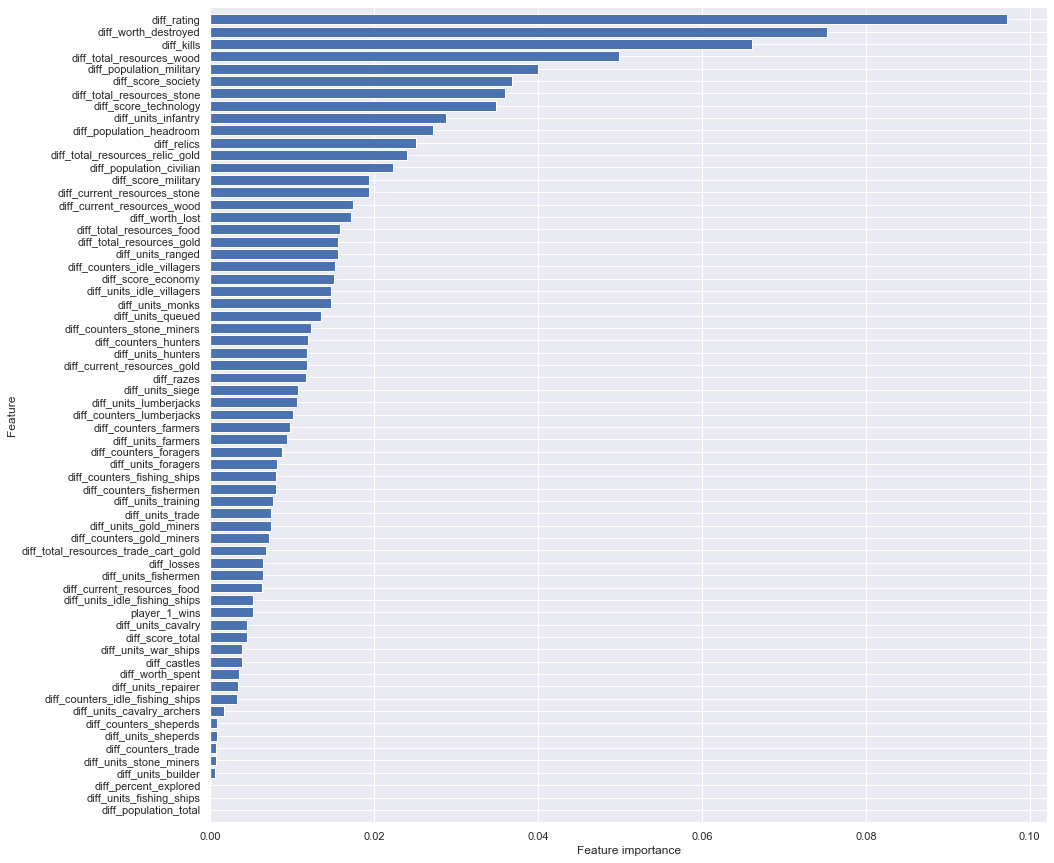

In [226]:
plot_feature_importances(rfor, data1.drop(columns=['match_id','current_time']))